# EDA

## More data preparation

### Load libraries

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('bmh')

### Load DataFrame and first glance

In [55]:
# Load DataFram and glance:

df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,CRASH_DATE,DAMAGE,ZIPCODE,SEX,AGE,MAKE,MODEL,VEHICLE_YEAR
0,0,09/05/2018 08:40:00 AM,"OVER $1,500",60634,F,39,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002
1,1,09/05/2018 08:40:00 AM,"OVER $1,500",60634,F,39,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014
2,2,09/05/2018 08:40:00 AM,"OVER $1,500",60625,M,32,"TOYOTA MOTOR COMPANY, LTD.",4RUNNER,2002
3,3,09/05/2018 08:40:00 AM,"OVER $1,500",60625,M,32,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,2014
4,4,08/29/2022 11:30:00 AM,"$501 - $1,500",60620,F,40,NISSAN,ALTIMA,2017


In [56]:
# Drop un-needed column:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918968 entries, 0 to 918967
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CRASH_DATE    918968 non-null  object
 1   DAMAGE        918968 non-null  object
 2   ZIPCODE       918968 non-null  object
 3   SEX           918968 non-null  object
 4   AGE           918968 non-null  int64 
 5   MAKE          918968 non-null  object
 6   MODEL         918968 non-null  object
 7   VEHICLE_YEAR  918968 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 56.1+ MB


In [57]:
# Check the date range:
df['CRASH_DATE'].min(), df['CRASH_DATE'].max()

('01/01/2020 01:00:00 AM', '12/31/2021 12:50:00 AM')

In [58]:
# Select date range starting from 06/01/2021 for smaller data size:
df = df[df['CRASH_DATE'] >= '06/01/2021']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573816 entries, 0 to 918967
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CRASH_DATE    573816 non-null  object
 1   DAMAGE        573816 non-null  object
 2   ZIPCODE       573816 non-null  object
 3   SEX           573816 non-null  object
 4   AGE           573816 non-null  int64 
 5   MAKE          573816 non-null  object
 6   MODEL         573816 non-null  object
 7   VEHICLE_YEAR  573816 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 39.4+ MB


### Inspect each column

#### 1. DAMAGE
Convert the dtype to 'category' for smaller data size

In [59]:
df['DAMAGE'].value_counts()

OVER $1,500      363274
$501 - $1,500    160935
$500 OR LESS      49607
Name: DAMAGE, dtype: int64

<AxesSubplot:>

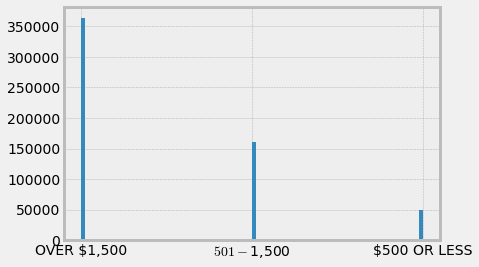

In [23]:
df['DAMAGE'].hist(bins='auto')

In [140]:
df.memory_usage(deep=True)

Index            3938856
CRASH_DATE      38896203
DAMAGE          33799605
ZIPCODE         30537570
SEX               492561
AGE              3938856
MAKE            32236000
MODEL           32217517
VEHICLE_YEAR     3938856
dtype: int64

In [141]:
df['DAMAGE']= df['DAMAGE'].astype('category')

In [142]:
df.memory_usage(deep=True)

Index            3938856
CRASH_DATE      38896203
DAMAGE            492644
ZIPCODE         30537570
SEX               492561
AGE              3938856
MAKE            32236000
MODEL           32217517
VEHICLE_YEAR     3938856
dtype: int64

#### 2. ZIPCODE

Trim the long tails and outliers: drop 'ZIPCODE' if its value_counts is less than 600.

In [95]:
zipcode_count = df['ZIPCODE'].value_counts()
zipcode_count

60629    22743
60639    18336
60632    15406
60620    14722
60617    14648
         ...  
64944        1
75248        1
02124        1
48836        1
62246        1
Name: ZIPCODE, Length: 7181, dtype: int64

In [86]:
zipcod_dict = zipcode_count.to_dict()
zipcod_dict

{'60629': 22743,
 '60639': 18336,
 '60632': 15406,
 '60620': 14722,
 '60617': 14648,
 '60619': 13926,
 '60623': 13655,
 '60651': 12989,
 '60634': 12705,
 '60628': 12568,
 '60641': 12412,
 '60618': 11518,
 '60625': 10679,
 '60609': 10638,
 '60647': 10327,
 '60649': 10065,
 '60608': 9636,
 '60645': 8716,
 '60659': 8561,
 '60643': 8480,
 '60644': 8366,
 '60652': 8018,
 '60630': 7891,
 '60637': 7804,
 '60640': 7688,
 '60636': 7633,
 '60626': 7506,
 '60638': 7287,
 '60616': 7086,
 '60624': 6915,
 '60804': 6196,
 '60653': 6115,
 '60660': 5755,
 '60615': 5745,
 '60612': 5481,
 '60621': 5464,
 '60622': 5336,
 '60707': 5123,
 '60613': 4687,
 '60614': 4332,
 '60657': 4258,
 '60402': 3906,
 '60453': 3542,
 '60646': 3239,
 '60656': 3225,
 '60655': 3184,
 '60610': 2978,
 '60409': 2839,
 '60631': 2812,
 '60827': 2769,
 '60076': 2415,
 '60202': 2173,
 '60607': 2140,
 '60459': 2117,
 '60706': 2056,
 '60419': 1987,
 '60411': 1968,
 '60016': 1965,
 '60805': 1911,
 '60077': 1887,
 '60605': 1868,
 '60302'

In [152]:
zipcode_drop_list= []

for k in zipcod_dict:
    if zipcod_dict[k] < 600:
        zipcode_drop_list.append(k)

len(zipcode_drop_list)

7066

In [153]:
df = df[df.ZIPCODE.isin(zipcode_drop_list) == False]

In [154]:
df['ZIPCODE'].value_counts()

60629    22397
60639    18063
60632    15169
60620    14257
60617    14202
         ...  
60471      639
60527      633
60085      615
60091      612
60090      600
Name: ZIPCODE, Length: 115, dtype: int64

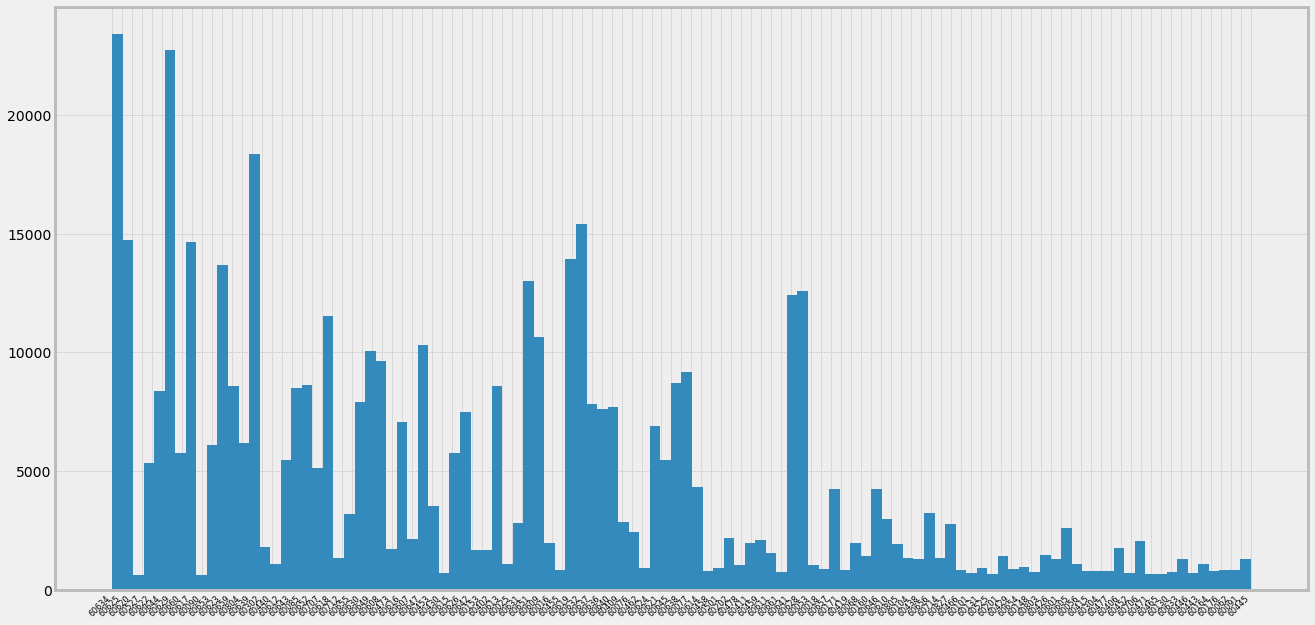

In [131]:
df['ZIPCODE'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.show();

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537162 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CRASH_DATE    537162 non-null  object
 1   DAMAGE        537162 non-null  object
 2   ZIPCODE       537162 non-null  object
 3   SEX           537162 non-null  object
 4   AGE           537162 non-null  int64 
 5   MAKE          537162 non-null  object
 6   MODEL         537162 non-null  object
 7   VEHICLE_YEAR  537162 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 36.9+ MB


#### 3. SEX
Drop 'SEX' = 'X' and convert the dtype to 'category' for smaller data size

In [132]:
df['SEX'].value_counts()

M    279537
F    212820
X       420
Name: SEX, dtype: int64

In [134]:
df.drop(df[df['SEX'] == 'X'].index, inplace = True)

In [139]:
df['SEX'].value_counts()

M    279537
F    212820
Name: SEX, dtype: int64

In [136]:
df.memory_usage(deep=True)

Index            3938856
CRASH_DATE      38896203
DAMAGE          33799605
ZIPCODE         30537570
SEX             30526134
AGE              3938856
MAKE            32236000
MODEL           32217517
VEHICLE_YEAR     3938856
dtype: int64

In [137]:
df['SEX']= df['SEX'].astype('category')

In [138]:
df.memory_usage(deep=True)

Index            3938856
CRASH_DATE      38896203
DAMAGE          33799605
ZIPCODE         30537570
SEX               492561
AGE              3938856
MAKE            32236000
MODEL           32217517
VEHICLE_YEAR     3938856
dtype: int64

#### 4. AGE
Select 'AGE' between 16 and 80

<AxesSubplot:>

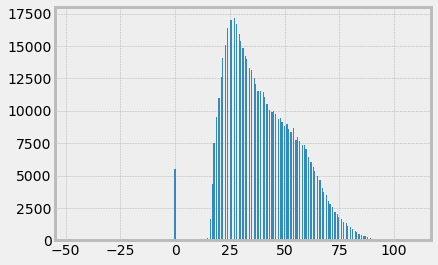

In [24]:
df['AGE'].hist(bins='auto')

In [145]:
df = df[(df.AGE >= 16) & (df.AGE <= 80)]

In [146]:
df['AGE'].value_counts()

27    14340
25    14056
26    14030
28    13952
24    13496
      ...  
76     1467
77     1318
78     1216
79     1020
80      995
Name: AGE, Length: 65, dtype: int64

<AxesSubplot:>

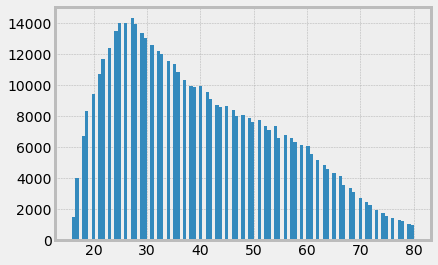

In [147]:
df['AGE'].hist(bins='auto')

#### 5. MAKE
Trim the long tails and outliers: drop 'MAKE' if its value_counts is less than 50.

In [148]:
df['MAKE'].value_counts()

CHEVROLET                                62204
NISSAN                                   48156
HONDA                                    45777
FORD                                     42461
TOYOTA MOTOR COMPANY, LTD.               38096
                                         ...  
PUMA                                         1
TOW PRO, INC., MCKINNEY, TX                  1
COMMERCIAL VEHICLES, INC. (TULSA, OK)        1
SPARROWHAWK TRAILER                          1
PICK-UP MANUFACTURING                        1
Name: MAKE, Length: 269, dtype: int64

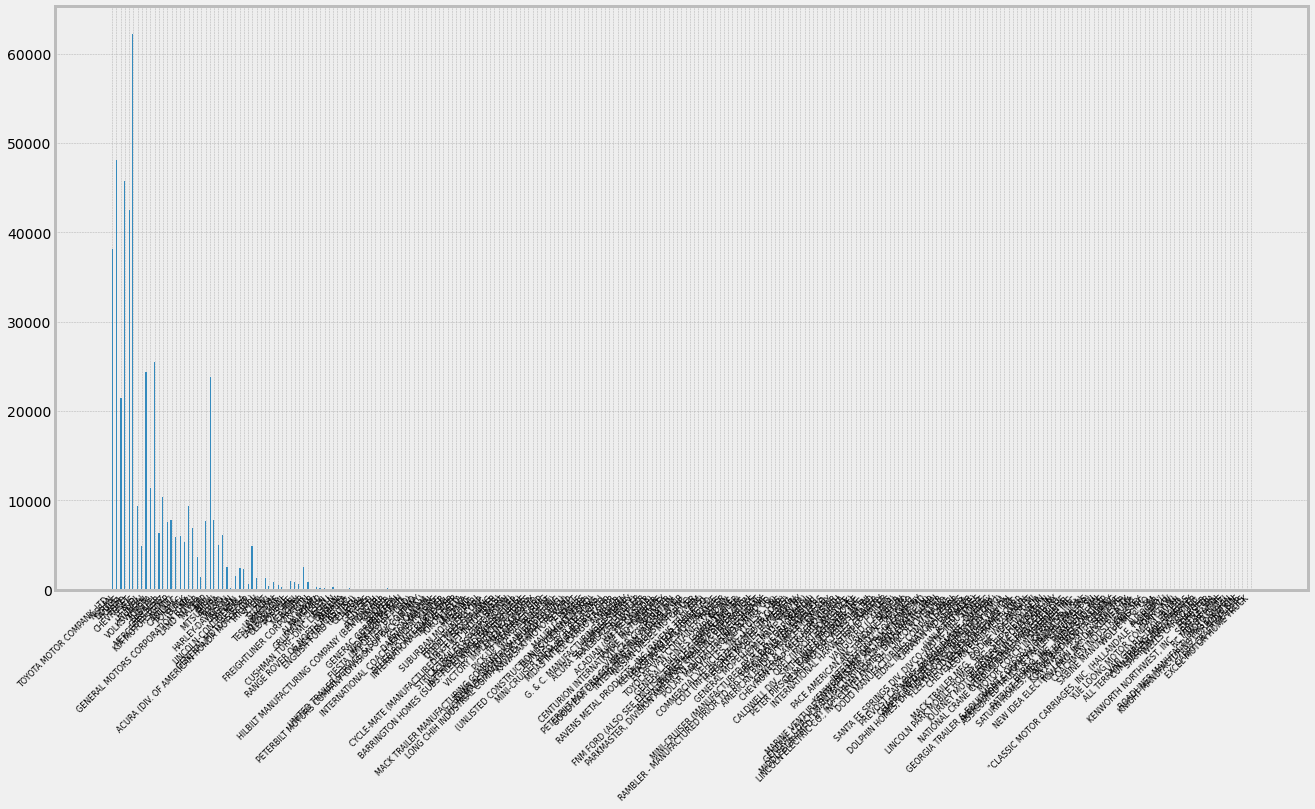

In [150]:
df['MAKE'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.show();

In [151]:
make_count = df['MAKE'].value_counts()
make_dict = make_count.to_dict()
make_dict

{'CHEVROLET': 62204,
 'NISSAN': 48156,
 'HONDA': 45777,
 'FORD': 42461,
 'TOYOTA MOTOR COMPANY, LTD.': 38096,
 'TOYOTA': 25489,
 'HYUNDAI': 24370,
 'JEEP': 23858,
 'DODGE': 21512,
 'VOLKSWAGEN': 11402,
 'CHRYSLER': 10364,
 'BUICK': 9381,
 'LEXUS': 9319,
 'KIA MOTORS CORP': 7795,
 'BMW': 7781,
 'MAZDA': 7736,
 'MERCEDES-BENZ': 7600,
 'KIA': 6868,
 'SUBARU': 6389,
 'ACURA': 6128,
 'CADILLAC': 5969,
 'INFINITI': 5866,
 'PONTIAC': 5377,
 'MITSUBISHI': 5011,
 'AUDI': 4912,
 'GENERAL MOTORS CORP.': 4910,
 'GENERAL MOTORS CORPORATION (GMC)': 3598,
 'VOLVO': 2534,
 'MERCURY': 2532,
 'SATURN': 2429,
 'LINCOLN-CONTINENTAL': 2279,
 'LINCOLN': 1575,
 'LAND ROVER': 1397,
 'SCION': 1315,
 'ACURA (DIV. OF AMERICAN HONDA MOTOR CO.)': 1268,
 'OLDSMOBILE': 949,
 'PORSCHE': 900,
 'SUZUKI': 846,
 'JAGUAR': 805,
 'MINI': 650,
 'TESLA': 595,
 'UNKNOWN': 535,
 'FIAT': 388,
 'SAAB': 307,
 'ISUZU': 269,
 'TESLA MOTORS': 245,
 'HARLEY-DAVIDSON': 231,
 'RANGE ROVER OF NORTH AMERICA': 181,
 'MASERATI': 134,
 'HUM

In [163]:
make_drop_list= []

for k in make_dict:
    if make_dict[k] < 50:
        make_drop_list.append(k)

len(make_drop_list)

209

In [164]:
df = df[df.MAKE.isin(make_drop_list) == False]

In [165]:
df['MAKE'].value_counts()

CHEVROLET                                   62204
NISSAN                                      48156
HONDA                                       45777
FORD                                        42461
TOYOTA MOTOR COMPANY, LTD.                  38096
TOYOTA                                      25489
HYUNDAI                                     24370
JEEP                                        23858
DODGE                                       21512
VOLKSWAGEN                                  11402
CHRYSLER                                    10364
BUICK                                        9381
LEXUS                                        9319
KIA MOTORS CORP                              7795
BMW                                          7781
MAZDA                                        7736
MERCEDES-BENZ                                7600
KIA                                          6868
SUBARU                                       6389
ACURA                                        6128


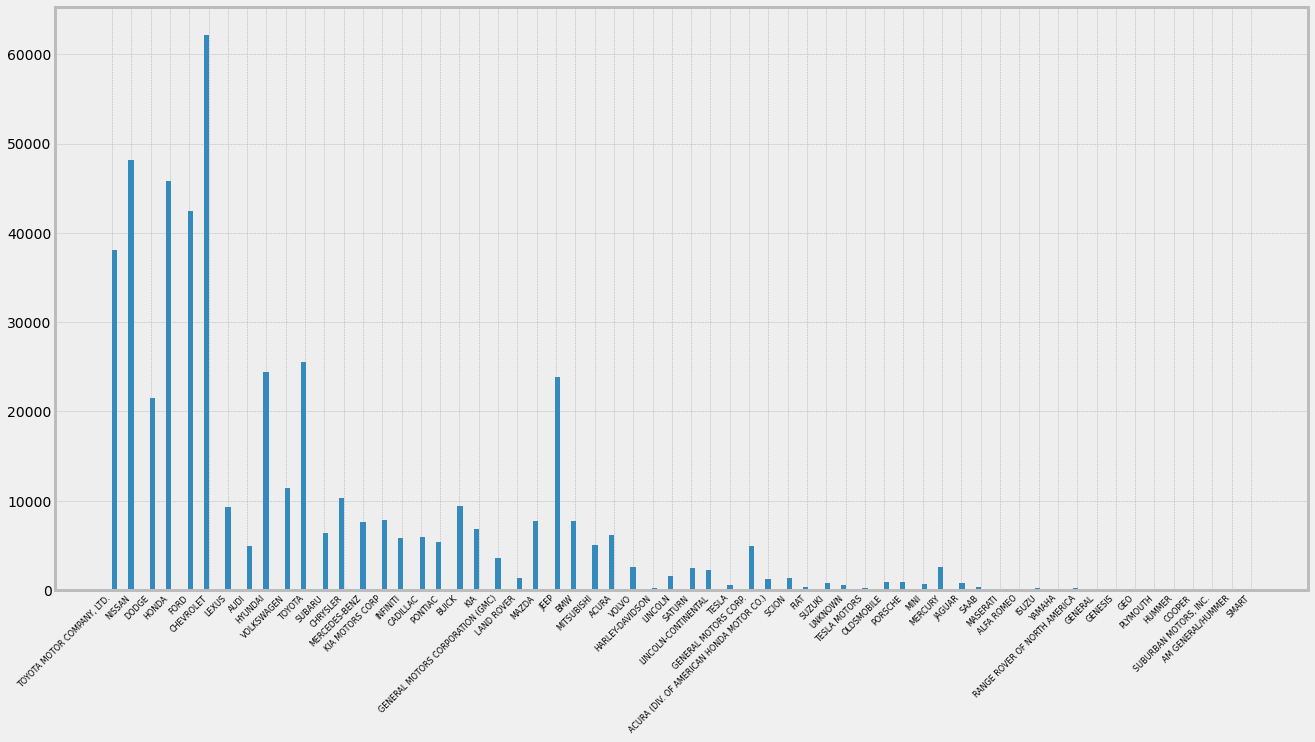

In [166]:
df['MAKE'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.show();

#### 6. MODEL
Trim the long tails and outliers: drop 'MODEL' if its value_counts is less than 100.

In [167]:
df['MODEL'].value_counts()

UNKNOWN                         30222
CAMRY                           17870
OTHER (EXPLAIN IN NARRATIVE)    14052
COROLLA                         13136
CIVIC                           12505
                                ...  
PIONEER                             1
3500 SERIES                         1
R8                                  1
ULTRALIGHT                          1
Crestline                           1
Name: MODEL, Length: 1329, dtype: int64

In [169]:
# Drop 'UNKNOWN':

df.drop(df[df['MODEL'] == 'UNKNOWN'].index, inplace = True)

In [170]:
df['MODEL'].value_counts()

CAMRY                                       17870
OTHER (EXPLAIN IN NARRATIVE)                14052
COROLLA                                     13136
CIVIC                                       12505
ACCORD                                      11260
                                            ...  
V-8                                             1
SSE                                             1
Supra                                           1
CJ-6 (for vehicle years 1989 to present)        1
J-20 (for vehicle years 1989 to present)        1
Name: MODEL, Length: 1328, dtype: int64

In [177]:
model_count = df['MODEL'].value_counts()
model_dict = model_count.to_dict()

model_drop_list= []

for k in model_dict:
    if model_dict[k] < 100:
        model_drop_list.append(k)

df = df[df.MODEL.isin(model_drop_list) == False]

In [178]:
df['MODEL'].value_counts()

CAMRY                            17870
OTHER (EXPLAIN IN NARRATIVE)     13514
COROLLA                          13136
CIVIC                            12505
ACCORD                           11260
                                 ...  
ML320 (sport utility)              103
MACAN                              103
RABBIT                             102
PRIZM (BEGIN MODEL YEAR 1998)      100
SEVILLE                            100
Name: MODEL, Length: 400, dtype: int64

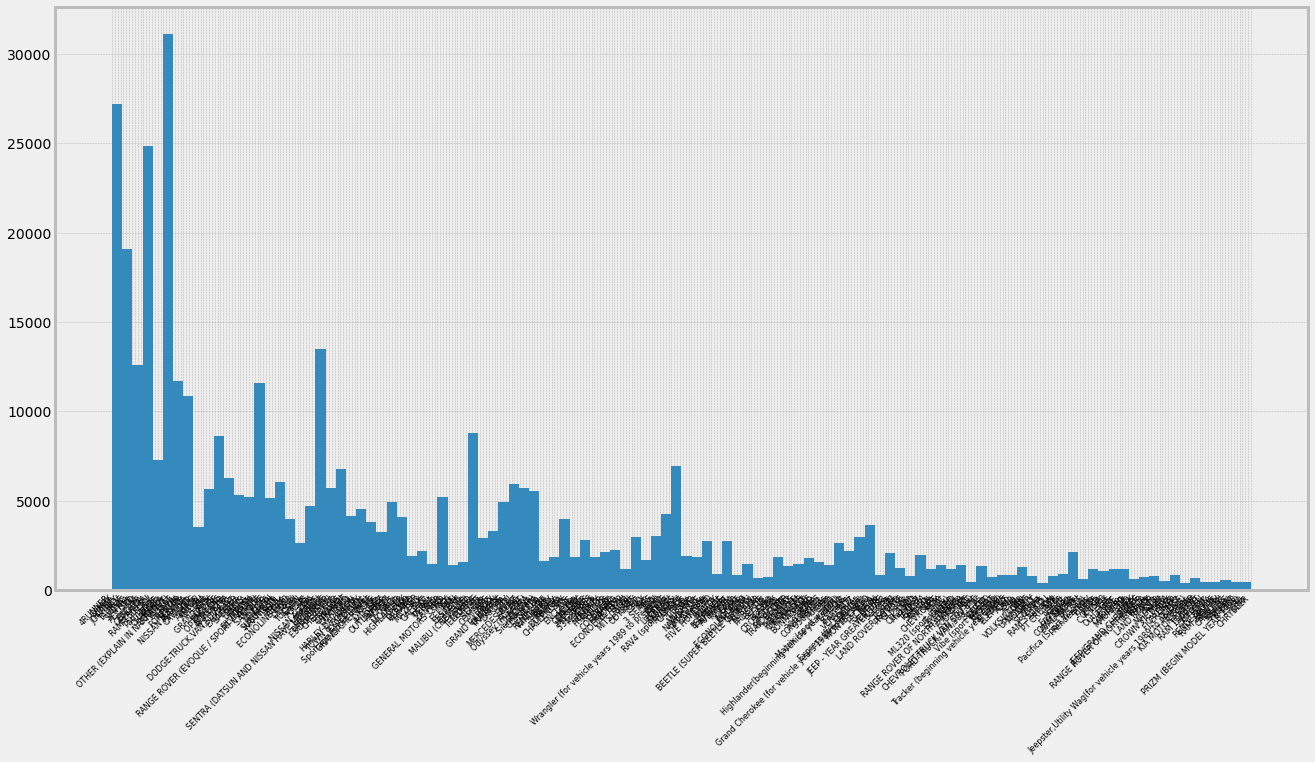

In [179]:
df['MODEL'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.show();

#### 7. VEHICLE_YEAR

In [181]:
df['VEHICLE_YEAR'].value_counts()

2015    32269
2016    30007
2017    28324
2014    28309
2013    27131
        ...  
2112        1
2918        1
2402        1
1962        1
2049        1
Name: VEHICLE_YEAR, Length: 131, dtype: int64

In [185]:
df = df[(df.VEHICLE_YEAR >= 1990) & (df.VEHICLE_YEAR <= 2022)]

In [186]:
df['VEHICLE_YEAR'].value_counts()

2015    32269
2016    30007
2017    28324
2014    28309
2013    27131
2012    23503
2007    20996
2018    20834
2011    20747
2008    20323
2006    18070
2010    18015
2005    16735
2019    15356
2009    15192
2004    14397
2003    12607
2002    10664
2020     9559
2001     7932
2000     6647
2021     6025
1999     4779
1998     3451
2022     2770
1997     2654
1996     1486
1995     1020
1994      664
1993      388
1992      246
1991      185
1990      129
Name: VEHICLE_YEAR, dtype: int64

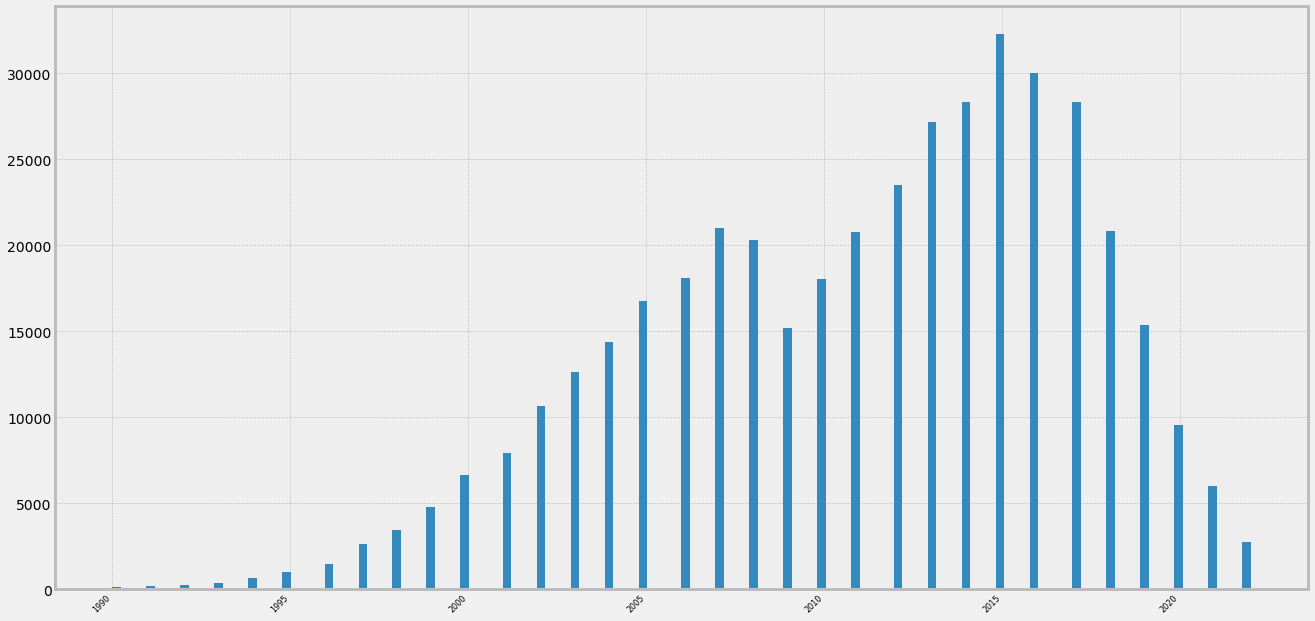

In [187]:
df['VEHICLE_YEAR'].hist(bins='auto', xlabelsize=8, figsize=[20,10])
plt.xticks(rotation=45, ha='right')
plt.show();

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421414 entries, 0 to 918966
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CRASH_DATE    421414 non-null  object  
 1   DAMAGE        421414 non-null  category
 2   ZIPCODE       421414 non-null  object  
 3   SEX           421414 non-null  category
 4   AGE           421414 non-null  int64   
 5   MAKE          421414 non-null  object  
 6   MODEL         421414 non-null  object  
 7   VEHICLE_YEAR  421414 non-null  int64   
dtypes: category(2), int64(2), object(4)
memory usage: 23.3+ MB


## DONE! Save the cleaned DataFrame

In [189]:
df.to_csv('df_clean.csv')